<a href="https://colab.research.google.com/github/rishil321/ISLP/blob/main/chap_2_question_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
import numpy as np
from pandas.api.types import is_numeric_dtype
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
auto = pd.read_csv("Auto.csv")
auto.dropna(axis=0)
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [57]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


Looks like there are no missing values. columns 0,1,2,3,4,5,6,7 are quantitative. name should be an object, but why is horsepower an object?

In [58]:
auto['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

let's replace the ? with a null value and convert it to numeric

In [59]:
auto['horsepower'] = pd.to_numeric( auto['horsepower'].replace('?',np.nan))
auto['horsepower'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 397 entries, 0 to 396
Series name: horsepower
Non-Null Count  Dtype  
--------------  -----  
392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [60]:
for column in auto.columns:
  if auto[column].dtype in ['float64','int64']:
   print(f"Min of column {column} is {np.min(auto[column])}")
   print(f"Max of column {column} is {np.max(auto[column])}")
   print(f"Avg of column {column} is {np.mean(auto[column])}")
   print(f"Std of column {column} is {np.std(auto[column])}")
   print("\r")
  else:
    print(f"Column {column} is not numeric")

Min of column mpg is 9.0
Max of column mpg is 46.6
Avg of column mpg is 23.51586901763224
Std of column mpg is 7.815941538224255

Min of column cylinders is 3
Max of column cylinders is 8
Avg of column cylinders is 5.458438287153652
Std of column cylinders is 1.699432585509141

Min of column displacement is 68.0
Max of column displacement is 455.0
Avg of column displacement is 193.53274559193954
Std of column displacement is 104.24803997948825

Min of column horsepower is 46.0
Max of column horsepower is 230.0
Avg of column horsepower is 104.46938775510205
Std of column horsepower is 38.442032714425984

Min of column weight is 1613
Max of column weight is 5140
Avg of column weight is 2970.2619647355164
Std of column weight is 846.8355568478047

Min of column acceleration is 8.0
Max of column acceleration is 24.8
Avg of column acceleration is 15.55566750629723
Std of column acceleration is 2.746529639056109

Min of column year is 70
Max of column year is 82
Avg of column year is 75.9949

In [61]:
auto.drop(auto.index[10:85],inplace=True)
for column in auto.columns:
  if auto[column].dtype in ['float64','int64']:
   print(f"Min of column {column} is {np.min(auto[column])}")
   print(f"Max of column {column} is {np.max(auto[column])}")
   print(f"Avg of column {column} is {np.mean(auto[column])}")
   print(f"Std of column {column} is {np.std(auto[column])}")
   print("\r")
  else:
    print(f"Column {column} is not numeric")

Min of column mpg is 11.0
Max of column mpg is 46.6
Avg of column mpg is 24.409316770186336
Std of column mpg is 7.901059770431428

Min of column cylinders is 3
Max of column cylinders is 8
Avg of column cylinders is 5.37888198757764
Std of column cylinders is 1.6548220499887507

Min of column displacement is 68.0
Max of column displacement is 455.0
Avg of column displacement is 187.6801242236025
Std of column displacement is 99.9653364268889

Min of column horsepower is 46.0
Max of column horsepower is 230.0
Avg of column horsepower is 101.23584905660377
Std of column horsepower is 36.12814854598646

Min of column weight is 1649
Max of column weight is 4997
Avg of column weight is 2936.807453416149
Std of column weight is 809.7272565540559

Min of column acceleration is 8.5
Max of column acceleration is 24.8
Avg of column acceleration is 15.700621118012423
Std of column acceleration is 2.7022304312647734

Min of column year is 70
Max of column year is 82
Avg of column year is 77.13043

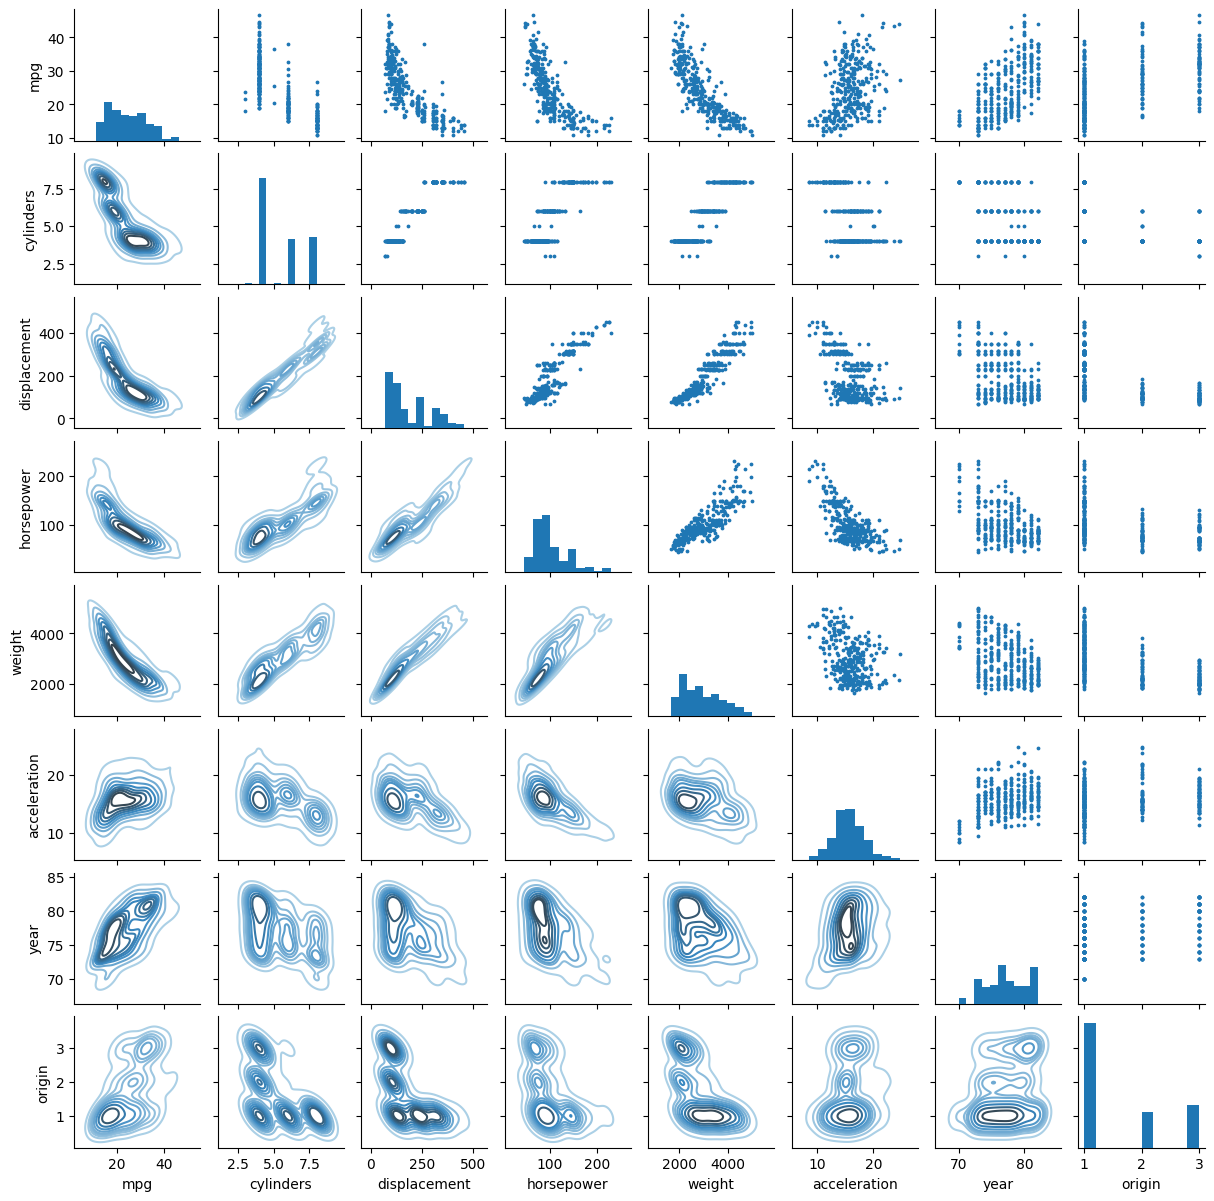

In [62]:
g = sns.PairGrid(auto)
g.map_upper(plt.scatter, s=3)
g.map_diag(plt.hist)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.fig.set_size_inches(12, 12)